In [1]:
import cv2
import numpy as np

from cv2 import aruco
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
unit_size = 60 # change it so can be divide by (marker_size + marker_gap_size)

wid_num = 10 # marker number height
hei_num = 3 # marker umber width

marker_size = 10 # marker size, square
marker_gap_size = 2 # marker gap size
marker_unit_size = marker_size + marker_gap_size

multi_factor = 2

In [3]:
board_width =  multi_factor * int((unit_size / marker_unit_size) * (marker_unit_size * (wid_num - 1) + marker_size))
board_heigh = multi_factor * int((unit_size / marker_unit_size) * (marker_unit_size * (hei_num - 1) + marker_size))

In [4]:
board_width

1180

In [5]:
teeth_start_idx = 0

aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_250)
aruco_dict.bytesList=aruco_dict.bytesList[teeth_start_idx:,:,:]
# aruco_dict.bytesList=aruco_dict.bytesList[100:,:,:]
board = aruco.GridBoard([wid_num,hei_num],marker_size, marker_gap_size,aruco_dict)
# board = aruco.GridBoard.Create(wid_num, hei_num, marker_size, marker_gap_size, aruco_dict)
imboard = board.generateImage([board_width, board_heigh])
# imboard = board.draw((board_width, board_heigh))

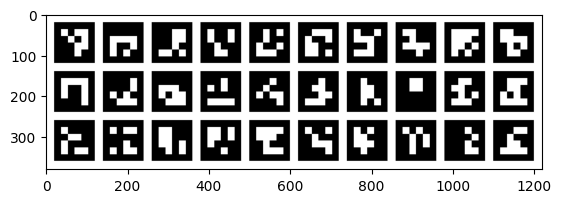

In [6]:

gap_len = multi_factor * int((unit_size / marker_unit_size) * marker_gap_size)
whiteslice = np.zeros((board_heigh, gap_len, 1), np.uint8)
whiteslice[:] = 255
whiteslice2 = np.zeros((gap_len, board_width + (2 * gap_len), 1), np.uint8)
whiteslice2[:] = 255

imboard2 = cv2.hconcat([whiteslice, imboard, whiteslice])
imboard2 = cv2.vconcat([whiteslice2, imboard2, whiteslice2])


plt.imshow(cv2.cvtColor(imboard2, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
imboard2.shape

(380, 1220)

In [8]:
operation_board = np.zeros((400, 1240), np.uint8)
operation_board[10:390, 10:1230] = imboard2



# OBJ


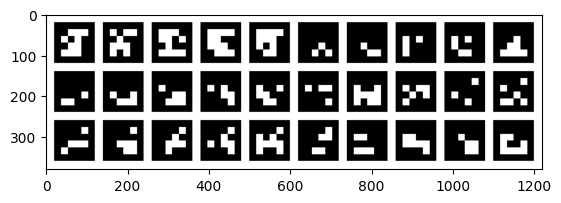

In [9]:
teeth_start_idx = 100

aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_250)
aruco_dict.bytesList=aruco_dict.bytesList[teeth_start_idx:,:,:]
# aruco_dict.bytesList=aruco_dict.bytesList[100:,:,:]
board = aruco.GridBoard([wid_num,hei_num],marker_size, marker_gap_size,aruco_dict)
# board = aruco.GridBoard.Create(wid_num, hei_num, marker_size, marker_gap_size, aruco_dict)
imboard = board.generateImage([board_width, board_heigh])


gap_len = multi_factor * int((unit_size / marker_unit_size) * marker_gap_size)
whiteslice = np.zeros((board_heigh, gap_len, 1), np.uint8)
whiteslice[:] = 255
whiteslice2 = np.zeros((gap_len, board_width + (2 * gap_len), 1), np.uint8)
whiteslice2[:] = 255

imboard2 = cv2.hconcat([whiteslice, imboard, whiteslice])
imboard2 = cv2.vconcat([whiteslice2, imboard2, whiteslice2])


plt.imshow(cv2.cvtColor(imboard2, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
operation_board2 = np.zeros((400, 1240), np.uint8)
operation_board2[10:390, 10:1230] = imboard2

In [13]:
A4_board = np.zeros((2970, 2100), np.uint8)
A4_board[:] = 255
# A4_board[200:1400, 200:1400] = teethboard
for i in range(2):
        A4_board[(200 + (i * 500)):(600 + (i *500)), (100):(100 + 1240)] = operation_board
for i in range(2,4):
        A4_board[(200 + (i * 500)):(600 + (i *500)), (100):(100 + 1240)] = operation_board2
cv2.imwrite("teethboard333-a4.png", A4_board)

True